# IPython Notebook Demo
### Thursday, August 10, 2017
### Julian Chan
### Undergraduate Summer Intern 2017

The IPython notebook is an interactive computational environment in which you can combine code execution, rich text, mathematics, plots, and rich media. Example uses include:
* data cleaning and transformation
* data visualization
* numerical simulation
* statistical modeling
* machine learning

Advantages of IPython notebook:
* can break code up into snippets and run them separately (helps with debugging)
* very easy to explore ideas and test code
* can integrate descriptions along with code
* working with graphical data is convenient because the output is directly below the code block that produced it
* very portable; can send code snippet and results to colleagues and they can open up the notebook from where you left off
* very convenient to do demos with (like this one!)

Disadvantages of IPython notebook:
* appearance is very unappealing for reporting results to manager(s)
* no text wrapping, so long lines of code require side-scrolling
* cannot easily hide code blocks
* plots generated and displayed in the notebook are images and not interactive
* exporting to PDF results in bad formatting

Use the code block below to toggle code display on/off.

In [16]:
from IPython.display import HTML, Image, display
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/Hide Code."></form>''')

## 1. Installation (Feel free to skip this section if you already have Python and the Jupyter Notebook installed)

We will download the Anaconda distribution that contains the IPython (Jupyter) notebook, Spyder IDE (integrated development environment), and the appropriate standard Python libraries. Navigate to: 

https://www.continuum.io/downloads. 

Images throughout the installation process are provided below for reference.

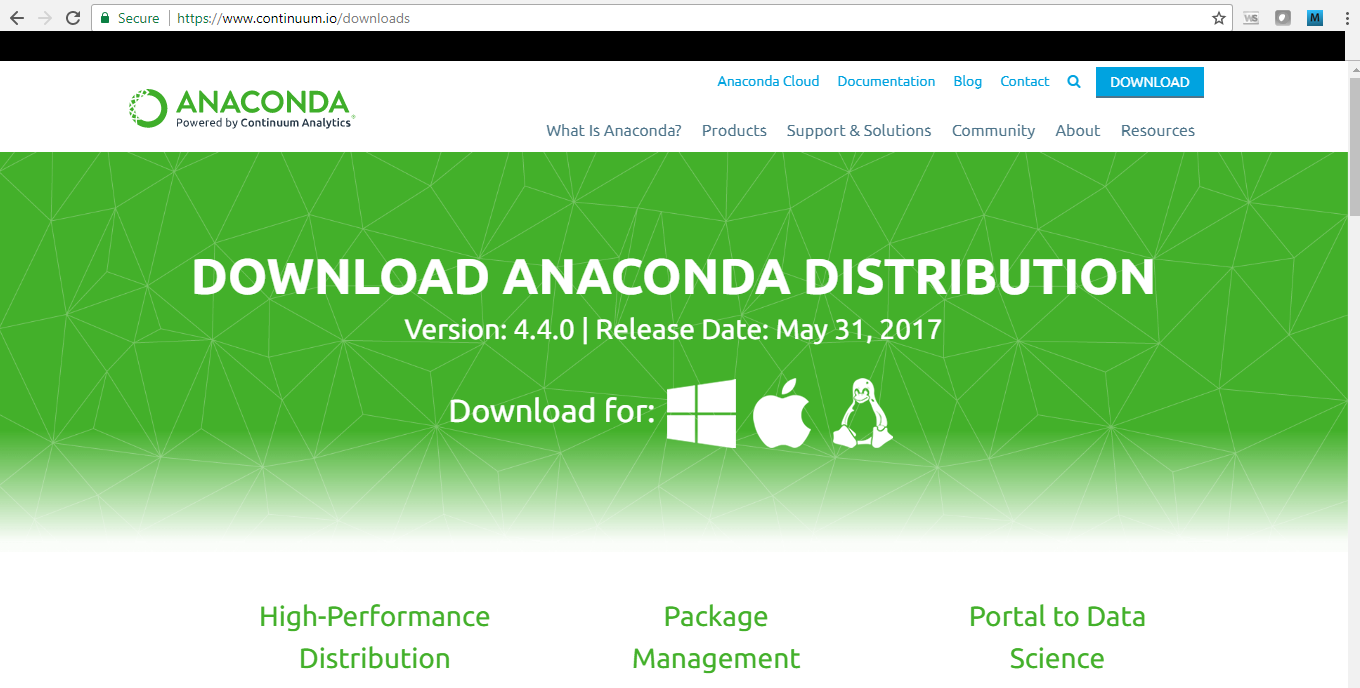

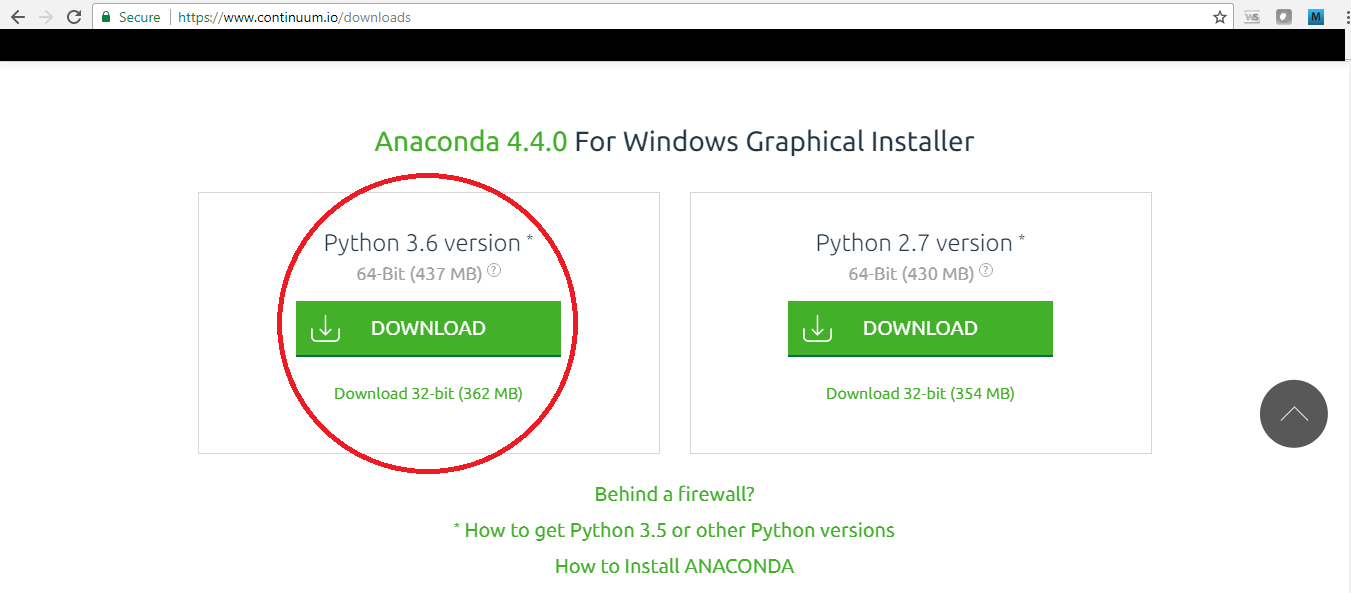

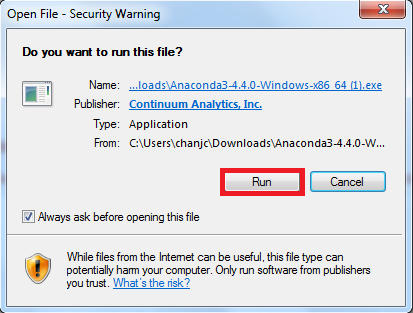

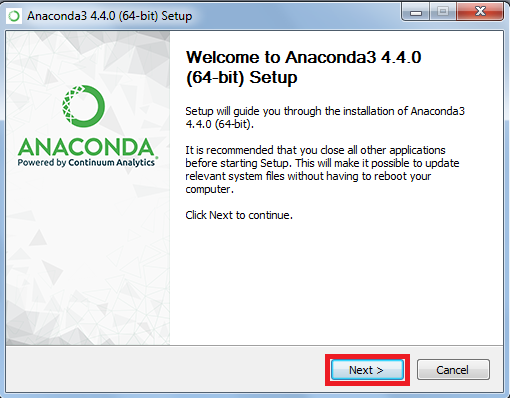

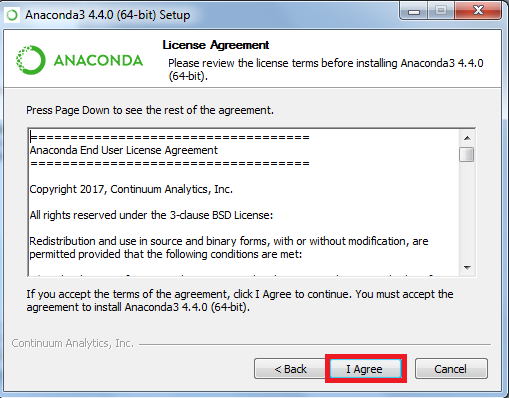

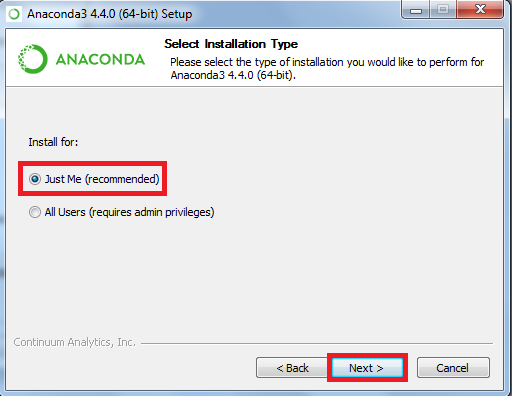

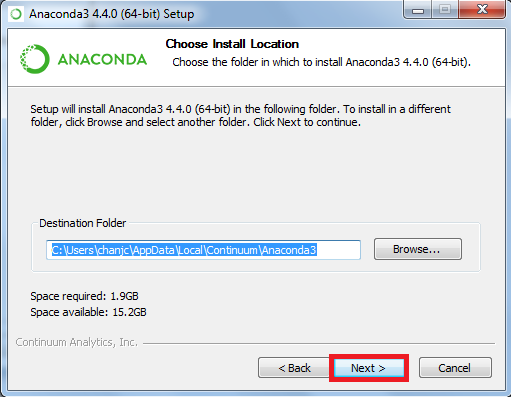

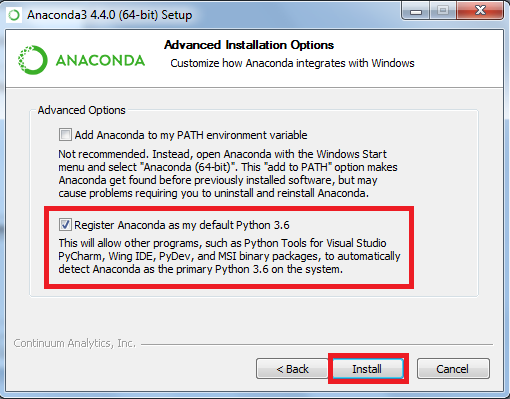

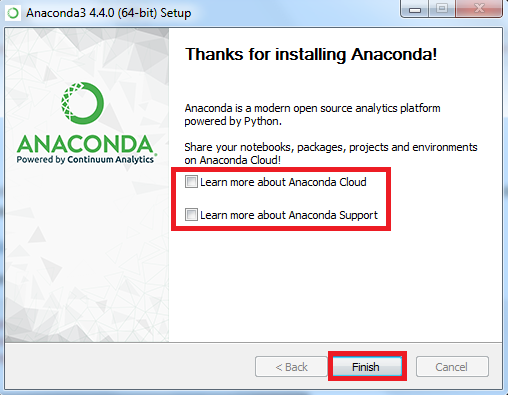

In [2]:
image_names = ["anaconda_home.png", "anaconda_download.png", "download_warning.png", "step1.png", "step2.png", "step3.png", "step4.png", "step5.png", "step6.png"]
for image in image_names:
    display(Image(image))
    print("\r\n")

## 2. Opening a new IPython Notebook

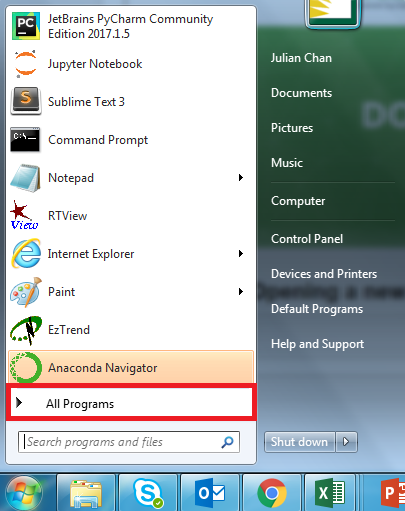

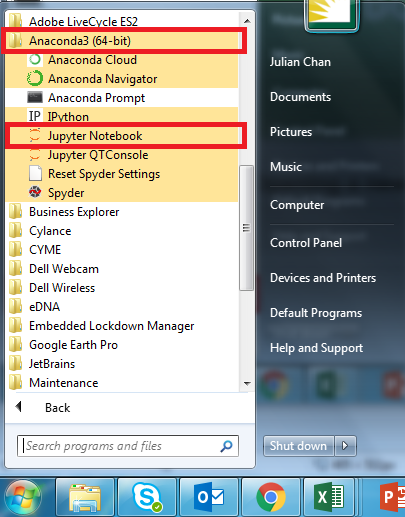

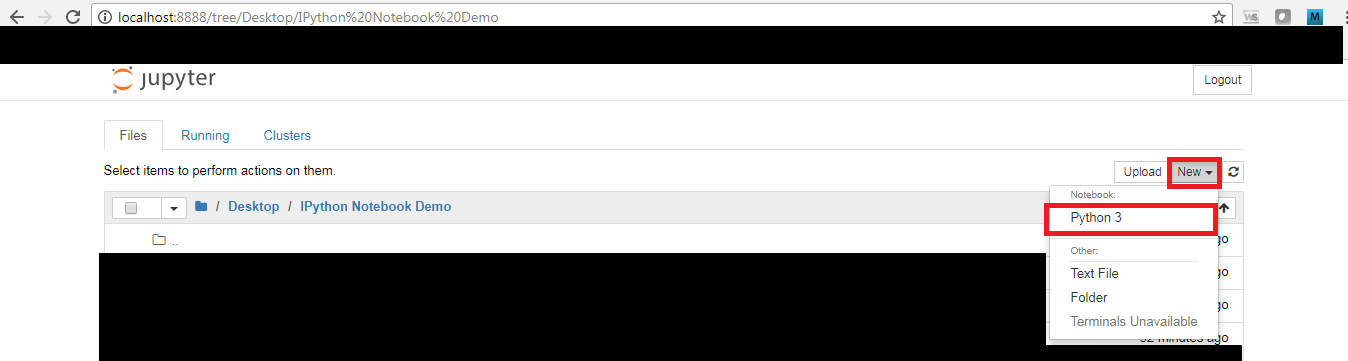

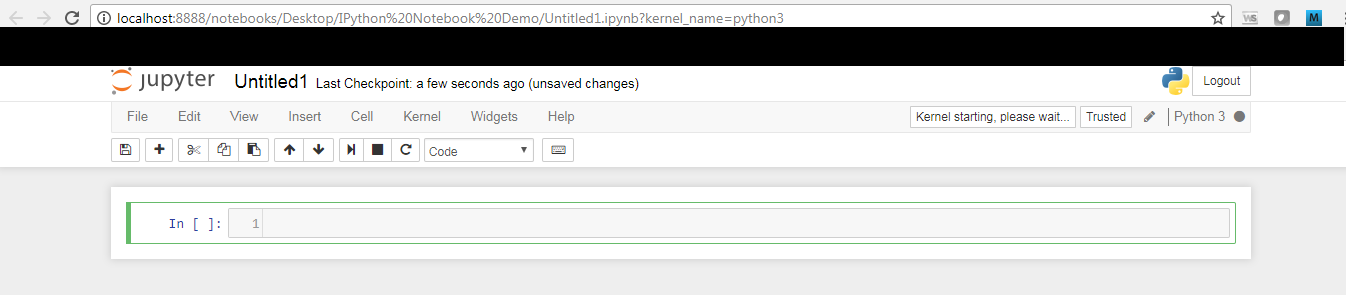

In [3]:
image_names = ["open1.png", "open2.png", "open3.png", "open4.png"]
for image in image_names:
    display(Image(image))
    print("\r\n")

## 3. Demo

### a. Basic I/O Operation

In [17]:
number_1 = int(input("Please enter your first number: "))
number_2 = int(input("Please enter your second number: "))
print("Their sum is: {}".format(number_1 + number_2))

Please enter your first number: 2
Please enter your second number: 4
Their sum is: 6


### b. Basic Plotting

We need to import a few Python libraries to help us plot our signals.
* numpy: fundamental package for scientific computing with Python (see: http://www.numpy.org/)
* matplotlib: 2-D plotting library providing a MATLAB-like interface (see: https://matplotlib.org/index.html)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

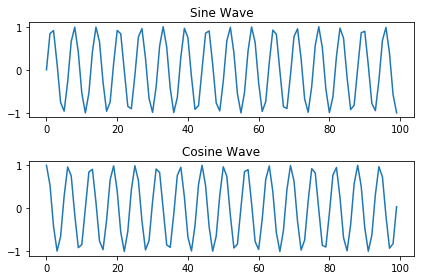

In [19]:
t = np.array([i for i in range(100)])
sin = np.sin(t)
cos = np.cos(t)

fig, (ax1, ax2) = plt.subplots(2)

ax1.set_title("Sine Wave")
ax1.plot(t, sin)

ax2.set_title("Cosine Wave")
ax2.plot(t, cos)

fig.tight_layout()

### c. Reading in Data from Microsoft Excel/CSV file

To read in data from a Microsoft Excel or Comma Separated Values (CSV) file, we need to import additional Python libraries. Note that because we ran the above code to import numpy and matplotlib, there is no need to import them again!

A popular Python library providing easy-to-use data structures and high-performance data analysis tools is pandas (see: http://pandas.pydata.org/).

In [20]:
import pandas as pd

In [21]:
data_table = pd.read_excel("sample_data.xlsx", sheetname="Sheet1", parse_dates={"datetime": ["Date", "Time"]})
data_table.head()

,datetime,MW,MVAR,kV
0,2016-01-01 00:00:00,201.055893,-45.990170,67.399529
1,2016-01-01 00:01:00,200.726303,-46.078072,67.384880
2,2016-01-01 00:02:00,200.616501,-46.407669,67.362907
3,2016-01-01 00:03:00,200.396698,-46.407669,67.370232
4,2016-01-01 00:04:00,200.396805,-46.165958,67.384880


In [22]:
datetimes = [pd.to_datetime(date) for date in data_table["datetime"]]

In [24]:
MW = data_table["MW"]

In [25]:
MVAR = data_table["MVAR"]

In [26]:
kV = data_table["kV"]

(735964.0, 735964.125)

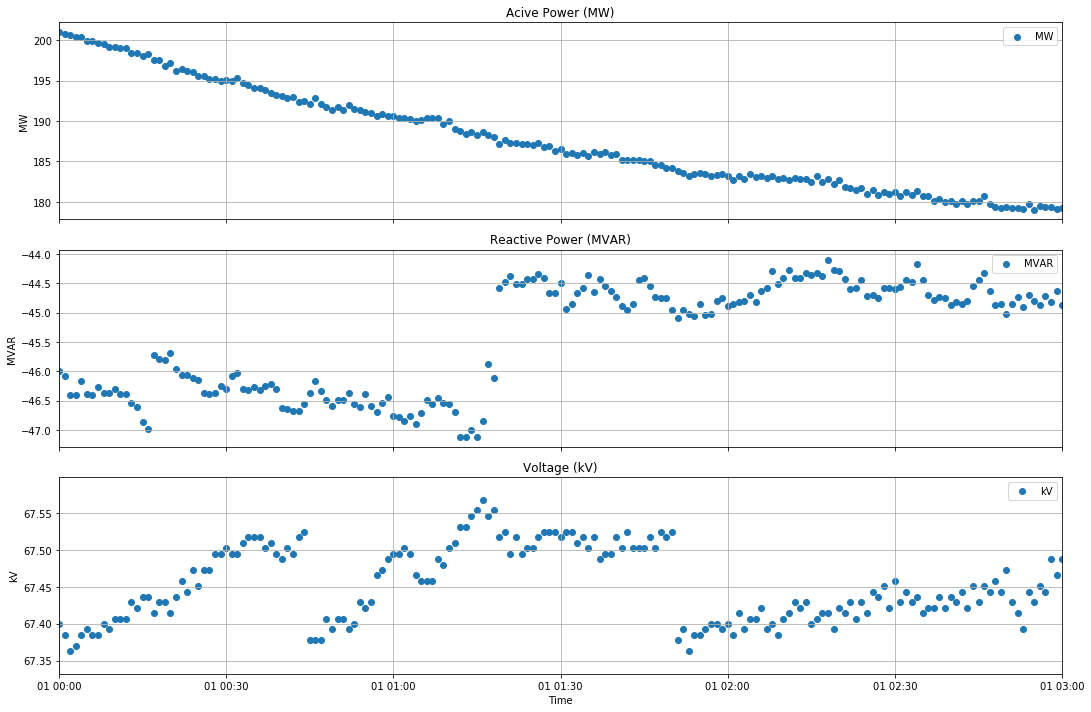

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(15, 10))

ax1.set_title("Acive Power (MW)")
ax1.scatter(datetimes, MW, label="MW")
ax1.set_ylabel("MW")
ax1.grid(True)
ax1.legend()

ax2.set_title("Reactive Power (MVAR)")
ax2.scatter(datetimes, MVAR, label="MVAR")
ax2.set_ylabel("MVAR")
ax2.grid(True)
ax2.legend()

ax3.set_title("Voltage (kV)")
ax3.scatter(datetimes, kV, label="kV")
ax3.set_xlabel("Time")
ax3.set_ylabel("kV")
ax3.grid(True)
ax3.legend()

fig.tight_layout()
plt.xlim(datetimes[0], datetimes[-1])

### d. Interactive Plotting

This example illustrates how we can use the Interact module (see: http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) from IPython Widgets to change our plotting parameters and immediately see changes reflected in the plot.

To show this interactive feature, we will use aliasing as an example. Aliasing occurs when we sample an analog signal at a frequency less than twice its bandwidth (see: https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem). As a result, the original analog signal "masquerades" as a lower frequency digital signal. In the plots below, the the original signal is in red and the sampled signal is in blue. Also, we only look at a time frame of 1 second.

Initially, the frequency of the original signal is set to 4 Hz (which means the signal repeats 4 times in 1 second) and we take 12 samples in that 1 second time frame (which means our sampling frequency is at 12 Hz). Since we sample at more than twice the frequency of the original signal, no aliasing occurs initially.

Play around with the sliders to see if you can get an aliased digital signal (blue curve "oscillates" at a lower frequency than the red curve).

In [31]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
import matplotlib.pyplot as plt
import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact_manual

def plot_sine(frequency=4.0, num_samples=12, plot_original=True):
    """
    Plot discrete samples of a sine wave on the interval ``[0, 1]``.
    """
    x = np.linspace(0, 1, num_samples + 2)
    y = np.sin(2 * frequency * np.pi * x)

    xf = np.linspace(0, 1, 1000)
    yf = np.sin(2 * frequency * np.pi * xf)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('signal')
    ax.set_title('Aliasing in discretely sampled periodic signal')
    
    if plot_original:
        ax.plot(xf, yf, color='red', linestyle='solid', linewidth=2)

    ax.plot(x,  y,  marker='o', linewidth=2)
    plt.show()

# plot_sine()
# The interact function automatically builds a user interface for exploring the
# plot_sine function.
interact_manual(plot_sine, frequency=(1.0, 22.0, 0.5), num_samples=(10, 16, 1), plot_original=True)

<function __main__.plot_sine>